<div>
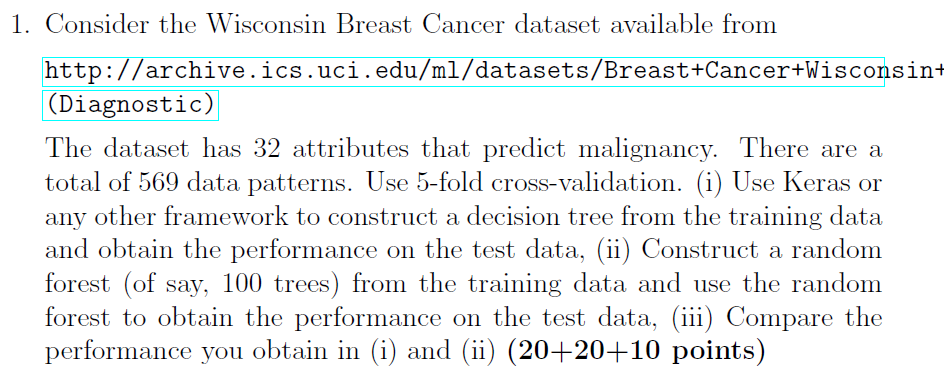
</div>

In [12]:
# all the inbuilt stuff that's required
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
import numpy as np

In [6]:
# loading the Wisconsin Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame = False)
print(X)
print(y)
print(X.shape)
print(y.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

### (i) Without Bagging

In [138]:
# creating a Decision Tree classifier
DTree = DecisionTreeClassifier(max_depth=5, random_state=42)

#### Random state is 42

In [139]:
# we are using stratified k fold cross validation. Here k is 5.
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

In [140]:
# fitting the model
scores = cross_val_score(DTree, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
print(scores)

[0.93859649 0.88596491 0.92982456 0.92982456 0.95575221]


In [141]:
# mean of accuracy
print('Accuracy: ',np.mean(scores))

Accuracy:  0.9279925477410339


### (ii) With Bagging

In [84]:
# importing the bagging module
from sklearn.ensemble import BaggingClassifier

In [173]:
# creating a Random Forest classifier
bag = BaggingClassifier(DecisionTreeClassifier(random_state=42, max_depth=5), n_estimators=100, 
                        bootstrap=True, n_jobs=-1, random_state=42)


In [174]:
# we are using stratified k fold cross validation. Here k is 5.
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

In [175]:
# fitting the model
scores = cross_val_score(bag, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
print(scores)

[0.96491228 0.92105263 0.97368421 0.95614035 0.97345133]


In [176]:
# mean of accuracy
print('Accuracy: ',np.mean(scores))

Accuracy:  0.9578481602235678


### (iii) Comparison

For decision tree model without bagging I got an accuracy of 92.8% and for decision tree model with bagging I got an accuracy of 95.7%.